In [667]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation as cval
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

In [668]:
#Set Path to Data Files
os.chdir('D:\Data Science\Projects\Loan Prediction')

#Load Data
X_train=pd.read_csv('train.csv')
X_test=pd.read_csv('test.csv')

In [669]:
#Quick Data Exploration
X_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [670]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [671]:
#print missing values in all columns
X_train.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [672]:
#Sneak peek into each of the columns

In [673]:
#Target Variable #Loan_Status
#encode labels into binary
X_train.Loan_Status=X_train.Loan_Status.map({'Y':1,'N':0})

In [674]:
#Categorical Variables First

In [675]:
#Gender

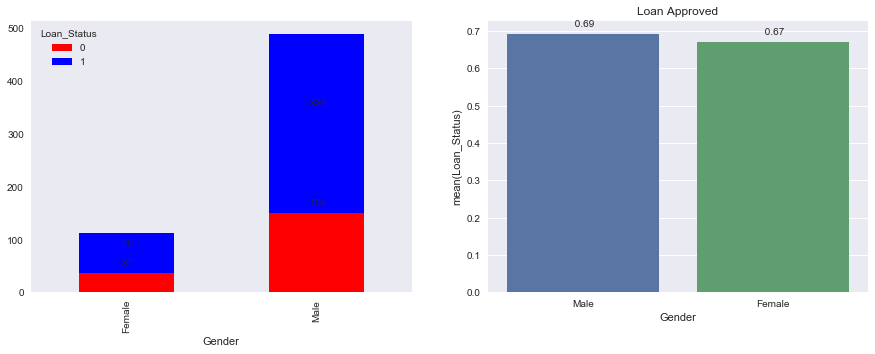

In [676]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
temp1 = pd.crosstab(X_train['Gender'], X_train['Loan_Status'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False,ax=axis1 )
for p in axis1.patches:
    axis1.annotate("% 0.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
mean_approved = X_train[["Gender", "Loan_Status"]].groupby(['Gender'],as_index=False).mean()
sns.barplot(x='Gender', y='Loan_Status', data=mean_approved, order =['Male','Female'],ax=axis2).set_title('Loan Approved')
for p in axis2.patches:
    axis2.annotate("% 1.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

#Plot on right indicates mean approved for Male is slightly higher than that of Female

In [677]:
#check for Nans
print "Null values for Gender in Training set:" + str(X_train.Gender.isnull().sum())
print "Null values for Gender in Test set:" + str(X_test.Gender.isnull().sum())

Null values for Gender in Training set:13
Null values for Gender in Test set:11


In [678]:
#impute gender by mode to fill NaNs
X_train['Gender']=X_train['Gender'].fillna(X_train['Gender'].value_counts().index[0])
X_test['Gender']=X_test['Gender'].fillna(X_test['Gender'].value_counts().index[0])

#Recheck for NaNs as above

In [679]:
#Married

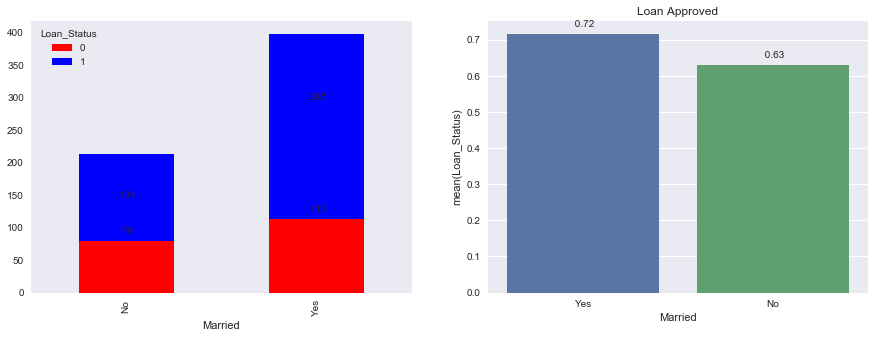

In [680]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
temp1 = pd.crosstab(X_train['Married'], X_train['Loan_Status'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False,ax=axis1 )
for p in axis1.patches:
    axis1.annotate("% 0.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
mean_approved = X_train[["Married", "Loan_Status"]].groupby(['Married'],as_index=False).mean()
sns.barplot(x='Married', y='Loan_Status', data=mean_approved, order =['Yes','No'],ax=axis2).set_title('Loan Approved')
for p in axis2.patches:
    axis2.annotate("% 1.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

#Plot on right indicates mean approved for Married is slightly higher than that of Unmarried

In [681]:
#check for Nans
print "Null values for Married in Training set:" + str(X_train.Married.isnull().sum())
print "Null values for Married in Test set:" + str(X_test.Married.isnull().sum())

Null values for Married in Training set:3
Null values for Married in Test set:0


In [682]:
#impute Married by mode to fill NaNs
X_train['Married']=X_train['Married'].fillna(X_train['Married'].value_counts().index[0])
X_test['Married']=X_test['Married'].fillna(X_test['Married'].value_counts().index[0])

#Recheck for NaNs as above

In [683]:
#Dependents

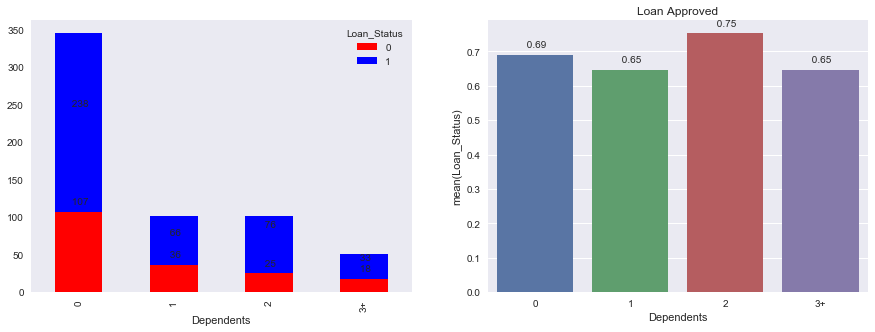

In [684]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
temp1 = pd.crosstab(X_train['Dependents'], X_train['Loan_Status'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False,ax=axis1 )
for p in axis1.patches:
    axis1.annotate("% 0.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
mean_approved = X_train[["Dependents", "Loan_Status"]].groupby(['Dependents'],as_index=False).mean()
sns.barplot(x='Dependents', y='Loan_Status', data=mean_approved, order =['0','1','2','3+'],ax=axis2).set_title('Loan Approved')
for p in axis2.patches:
    axis2.annotate("% 1.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

#Plot on right indicates mean approved for Dependents=2 is higher than other categories

In [685]:
#check for Nans
print "Null values for Dependents in Training set:" + str(X_train.Dependents.isnull().sum())
print "Null values for Dependents in Test set:" + str(X_test.Dependents.isnull().sum())

Null values for Dependents in Training set:15
Null values for Dependents in Test set:10


In [686]:
#impute Dependents by mode to fill NaNs
X_train['Dependents']=X_train['Dependents'].fillna(X_train['Dependents'].value_counts().index[0])
X_test['Dependents']=X_test['Dependents'].fillna(X_test['Dependents'].value_counts().index[0])

#Recheck for NaNs as above

In [687]:
#Education

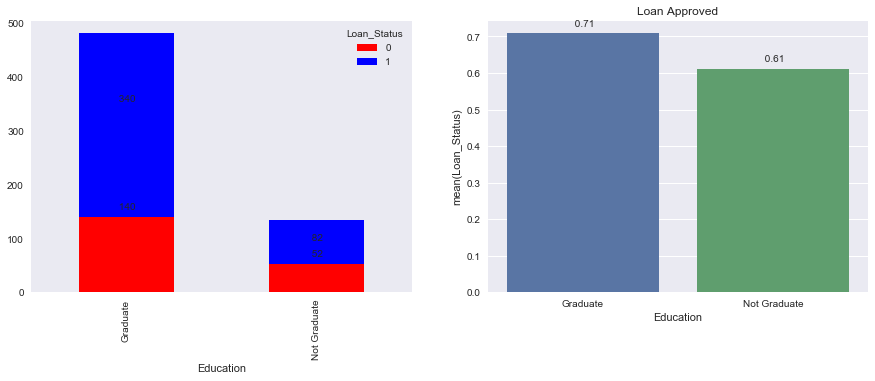

In [688]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
temp1 = pd.crosstab(X_train['Education'], X_train['Loan_Status'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False,ax=axis1 )
for p in axis1.patches:
    axis1.annotate("% 0.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
mean_approved = X_train[["Education", "Loan_Status"]].groupby(['Education'],as_index=False).mean()
sns.barplot(x='Education', y='Loan_Status', data=mean_approved, order =['Graduate','Not Graduate'],ax=axis2).set_title('Loan Approved')
for p in axis2.patches:
    axis2.annotate("% 1.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

#Plot on right indicates mean approved for Graduate is higher than that of Not Graduate

In [689]:
#check for Nans
print "Null values for Education in Training set:" + str(X_train.Education.isnull().sum())
print "Null values for Education in Test set:" + str(X_test.Education.isnull().sum())

#No NaNs, hence no need for imputation

Null values for Education in Training set:0
Null values for Education in Test set:0


In [690]:
#Property_Area

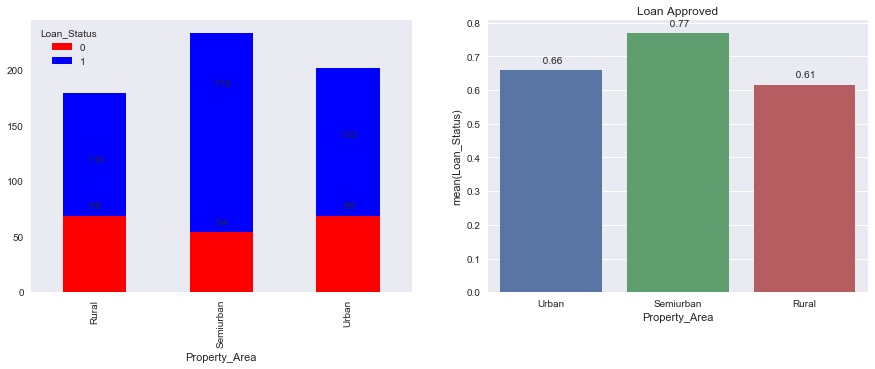

In [691]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
temp1 = pd.crosstab(X_train['Property_Area'], X_train['Loan_Status'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False,ax=axis1 )
for p in axis1.patches:
    axis1.annotate("% 0.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
mean_approved = X_train[["Property_Area", "Loan_Status"]].groupby(['Property_Area'],as_index=False).mean()
sns.barplot(x='Property_Area', y='Loan_Status', data=mean_approved,order =['Urban','Semiurban','Rural'],ax=axis2).set_title('Loan Approved')
for p in axis2.patches:
    axis2.annotate("% 1.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

#Plot on right indicates mean approved for Semiurban is higher than that of Urban and Rural categories

In [692]:
#Check for NaNs
print "Null values for Property_Area in Training set:" + str(X_train.Property_Area.isnull().sum())
print "Null values for Property_Area in Test set:" + str(X_test.Property_Area.isnull().sum())

#No NaNs, hence no need to impute

Null values for Property_Area in Training set:0
Null values for Property_Area in Test set:0


In [693]:
#Self_Employed

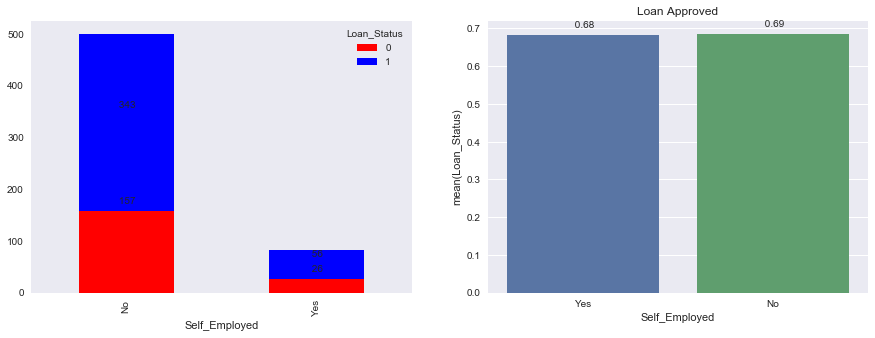

In [694]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
temp1 = pd.crosstab(X_train['Self_Employed'], X_train['Loan_Status'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False,ax=axis1 )
for p in axis1.patches:
    axis1.annotate("% 0.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
mean_approved = X_train[["Self_Employed", "Loan_Status"]].groupby(['Self_Employed'],as_index=False).mean()
sns.barplot(x='Self_Employed', y='Loan_Status', data=mean_approved,order =['Yes','No'],ax=axis2).set_title('Loan Approved')
for p in axis2.patches:
    axis2.annotate("% 1.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

#Plot on right indicates mean approved for both categories of Self_Employed is almost same

In [695]:
#Check for NaNs
print "Null values for Self_Employed in Training set:" + str(X_train.Self_Employed.isnull().sum())
print "Null values for Self_Employed in Test set:" + str(X_test.Self_Employed.isnull().sum())


Null values for Self_Employed in Training set:32
Null values for Self_Employed in Test set:23


In [696]:
#impute Self_Employed by mode to fill NaNs
X_train['Self_Employed']=X_train['Self_Employed'].fillna(X_train['Self_Employed'].value_counts().index[0])
X_test['Self_Employed']=X_test['Self_Employed'].fillna(X_test['Self_Employed'].value_counts().index[0])

#recheck for NaNs as above

In [697]:
#Credit_History

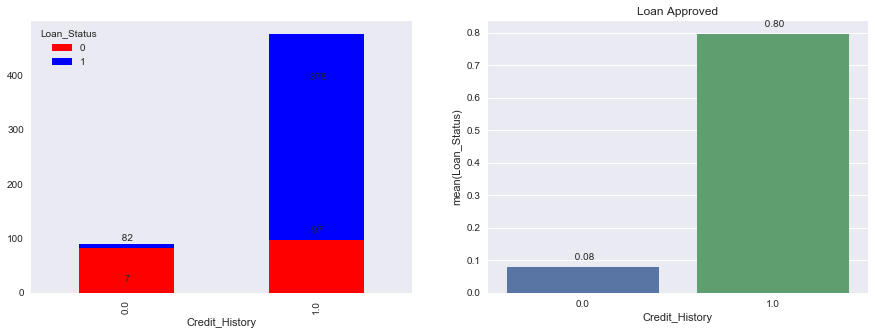

In [698]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
temp1 = pd.crosstab(X_train['Credit_History'], X_train['Loan_Status'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False,ax=axis1 )
for p in axis1.patches:
    axis1.annotate("% 0.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
mean_approved = X_train[["Credit_History", "Loan_Status"]].groupby(['Credit_History'],as_index=False).mean()
sns.barplot(x='Credit_History', y='Loan_Status', data=mean_approved,ax=axis2).set_title('Loan Approved')
for p in axis2.patches:
    axis2.annotate("% 1.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

#Plot on right indicates mean approved for both Credit_History=1.0 is much higher than that of of Credit_History=0.0

In [699]:
#Check for NaNs
print "Null values for Credit_History in Training set:" + str(X_train.Credit_History.isnull().sum())
print "Null values for Credit_History in Test set:" + str(X_test.Credit_History.isnull().sum())


Null values for Credit_History in Training set:50
Null values for Credit_History in Test set:29


In [700]:
#impute Credit_History by mode to fill NaNs
X_train['Credit_History']=X_train['Credit_History'].fillna(X_train['Credit_History'].value_counts().index[0])
X_test['Credit_History']=X_test['Credit_History'].fillna(X_test['Credit_History'].value_counts().index[0])

#recheck for NaNs as above

In [701]:
#Use LabelEncoder to map all catgeorical variables into numeric

#Note here categories for every feature of train and test set are same hence using the Label Encoder fitted on training set
#will result in same mapping for test set
#If a feature in training and test set has different categories, it needs to be dealt differently 
#(ex. by row binding train and test sets and then applying LabelEncoder )

var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])


In [702]:
#Coming to numeric variables now

In [703]:
#ApplicantIncome

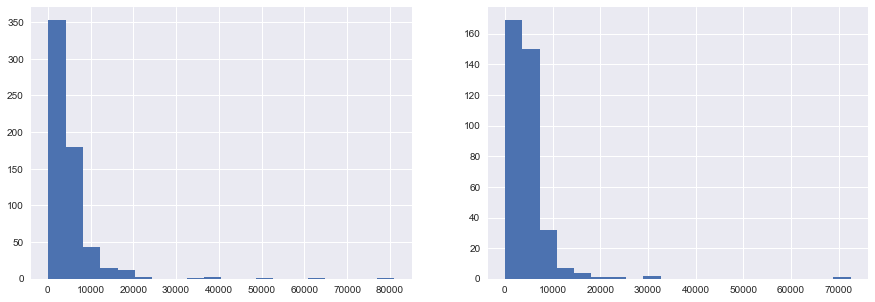

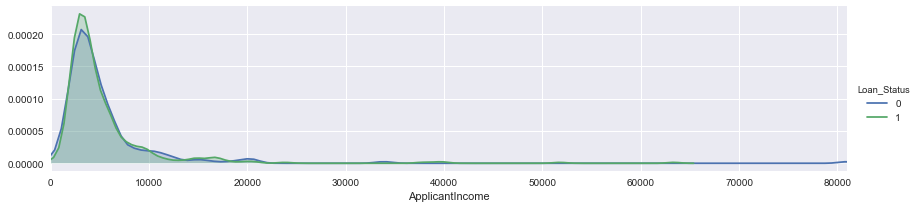

In [704]:
#check distribution of continuous variables - ApplicantIncome
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
X_train.ApplicantIncome.hist(bins=20,ax=axis1)
X_test.ApplicantIncome.hist(bins=20,ax=axis2)

#draw density plots
facet = sns.FacetGrid(X_train, hue="Loan_Status",aspect=4)
facet.map(sns.kdeplot,'ApplicantIncome',shade= True)
facet.set(xlim=(0, X_train['ApplicantIncome'].max()))
facet.add_legend()
plt.show()

#seem to be right-skewed

In [705]:
#Check for NaNs
print "Null values for ApplicantIncome in Training set:" + str(X_train.ApplicantIncome.isnull().sum())
print "Null values for ApplicantIncome in Test set:" + str(X_test.ApplicantIncome.isnull().sum())

Null values for ApplicantIncome in Training set:0
Null values for ApplicantIncome in Test set:0


In [706]:
#CoapplicantIncome

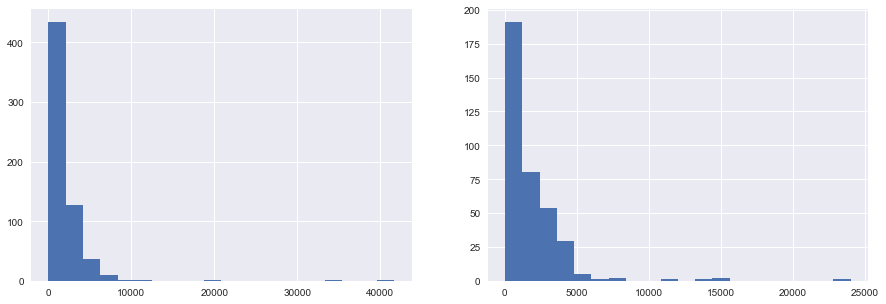

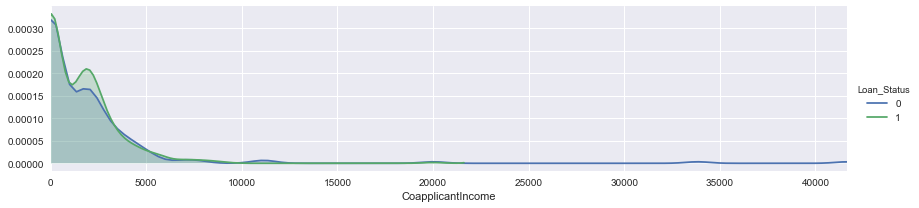

In [707]:
#check distribution of continuous variables - CopplicantIncome
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
X_train.CoapplicantIncome.hist(bins=20,ax=axis1)
X_test.CoapplicantIncome.hist(bins=20,ax=axis2)

#draw density plots
facet = sns.FacetGrid(X_train, hue="Loan_Status",aspect=4)
facet.map(sns.kdeplot,'CoapplicantIncome',shade= True)
facet.set(xlim=(0, X_train['CoapplicantIncome'].max()))
facet.add_legend()
plt.show()

#seem to be right-skewed, also indicates a few outliersii

In [708]:
#Check for NaNs
print "Null values for CoapplicantIncome in Training set:" + str(X_train.CoapplicantIncome.isnull().sum())
print "Null values for CoapplicantIncome in Test set:" + str(X_test.CoapplicantIncome.isnull().sum())

Null values for CoapplicantIncome in Training set:0
Null values for CoapplicantIncome in Test set:0


In [709]:
#Some applicants have high ApplicantIncome while others have high CoapplicantIncome
#So it might be a good idea to combine both as Total_Income (Feature Engineering...)
X_train['Total_Income']=(X_train.ApplicantIncome + X_train.CoapplicantIncome)
X_test['Total_Income']=(X_test.ApplicantIncome + X_test.CoapplicantIncome)

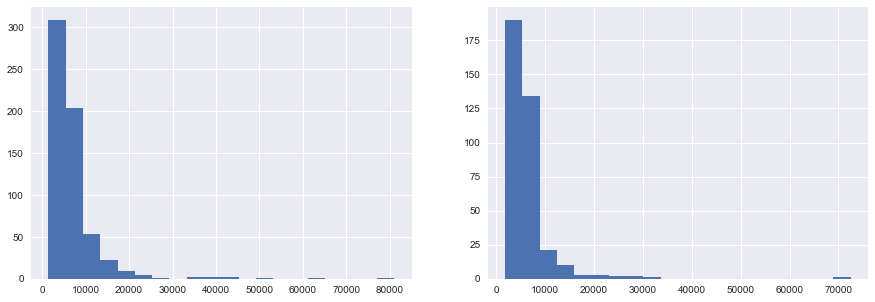

In [710]:
#check distribution of continuous variables - Total_Income
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
X_train.Total_Income.hist(bins=20,ax=axis1)
X_test.Total_Income.hist(bins=20,ax=axis2)
plt.show()

#seem to be right-skewed, also indicates a few outliers

In [711]:
#Dropping ApplicantIncome and CoapplicantIncome
X_train=X_train.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)
X_test=X_test.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

In [712]:
#LoanAmount

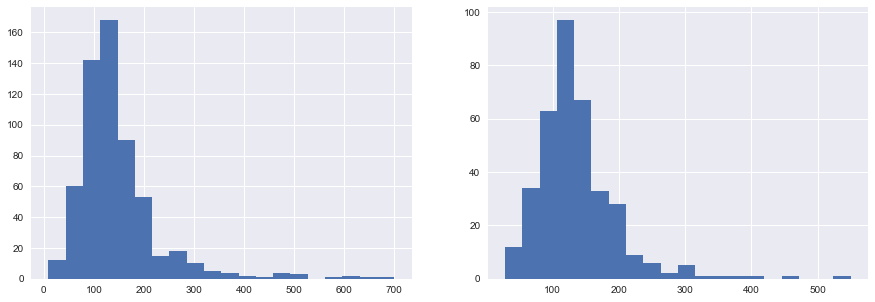

In [713]:
#check distribution of continuous variables - LoanAmount
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
X_train.LoanAmount.hist(bins=20,ax=axis1)
X_test.LoanAmount.hist(bins=20,ax=axis2)
plt.show()

#seem to be right-skewed, also indicates outliers

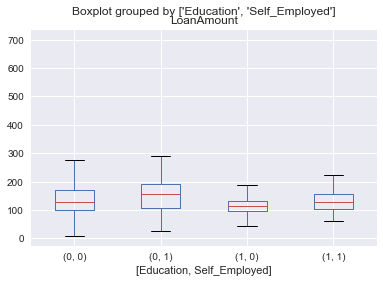

In [714]:
#Some more exploration for Total_Income
#we can use different hue variables to investigate more
X_train.boxplot(column='LoanAmount', by= ['Education','Self_Employed'])

#Note that there are variations in the median of loan amount for each group and we can use these groups based on Education
#and Self_Employed to impute missing values for LoanAmount

In [715]:
#Check for NaNs
print "Null values for LoanAmount in Training set:" + str(X_train.LoanAmount.isnull().sum())
print "Null values for LoanAmount in Test set:" + str(X_test.LoanAmount.isnull().sum())

Null values for LoanAmount in Training set:22
Null values for LoanAmount in Test set:5


In [716]:
#Check pivot tables for Train & Test Sets LoanAmount values grouped by Education and Self_Employed
impute_grps_train = X_train.pivot_table(values=["LoanAmount"], index=["Education","Self_Employed"], aggfunc=np.mean)
impute_grps_test = X_test.pivot_table(values=["LoanAmount"], index=["Education","Self_Employed"], aggfunc=np.mean)
print impute_grps_train

                         LoanAmount
Education Self_Employed            
0         0              149.724566
          1              182.241935
1         0              115.900000
          1              134.647059


In [717]:
#iterate only through rows with missing LoanAmount
#Use means of these groups for LoanAmount imputation
for i,row in X_train.loc[X_train['LoanAmount'].isnull(),:].iterrows():
  ind = tuple([row['Education'],row['Self_Employed']])
  X_train.loc[i,'LoanAmount'] = impute_grps_train.loc[ind].values[0]

    
for i,row in X_test.loc[X_test['LoanAmount'].isnull(),:].iterrows():
  ind = tuple([row['Education'],row['Self_Employed']])
  X_test.loc[i,'LoanAmount'] = impute_grps_test.loc[ind].values[0]
    
#Recheck for NaNs as above

In [718]:
#Loan_Amount_Term

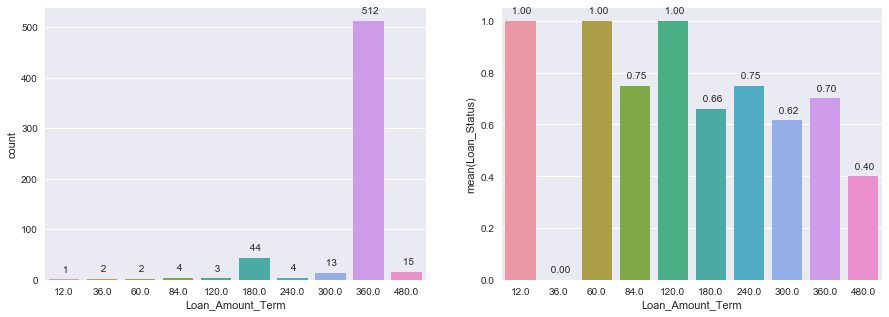

In [719]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Loan_Amount_Term', data=X_train, ax=axis1)
for p in axis1.patches:
    axis1.annotate("% 0.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
mean_approved = X_train[["Loan_Amount_Term", "Loan_Status"]].groupby(['Loan_Amount_Term'],as_index=False).mean()
sns.barplot(x='Loan_Amount_Term', y='Loan_Status', data=mean_approved)
for p in axis2.patches:
    axis2.annotate("% 1.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

#Plot on right indicates mean approved for Male is slightly higher than that of Female

In [720]:
#Check for NaNs
print "Null values for Loan_Amount_Term in Training set:" + str(X_train.Loan_Amount_Term.isnull().sum())
print "Null values for Loan_Amount_Term in Test set:" + str(X_test.Loan_Amount_Term.isnull().sum())

Null values for Loan_Amount_Term in Training set:14
Null values for Loan_Amount_Term in Test set:6


In [721]:
#impute by mode to fill NaNs
X_train['Loan_Amount_Term']=X_train['Loan_Amount_Term'].fillna(X_train['Loan_Amount_Term'].value_counts().index[0])
X_test['Loan_Amount_Term']=X_test['Loan_Amount_Term'].fillna(X_test['Loan_Amount_Term'].value_counts().index[0])

In [722]:
#Convert Loan_Amount_Term from float to int
X_train['Loan_Amount_Term'] = X_train['Loan_Amount_Term'].astype(int)
X_test['Loan_Amount_Term'] = X_test['Loan_Amount_Term'].astype(int)

In [723]:
#Feature Engineering
#Add an additional feature EMI where EMI= [P x R x (1+R)^N]/[(1+R)^N-1]
#Where P is Loan Amount (given), N is repayment period in months (given), Assuming R to be 9%

X_train['EMI']=(X_train.LoanAmount*0.09*(1.09**X_train.Loan_Amount_Term))/((1.09**X_train.Loan_Amount_Term)-1)
X_test['EMI']=(X_test.LoanAmount*0.09*(1.09**X_test.Loan_Amount_Term))/((1.09**X_test.Loan_Amount_Term)-1)

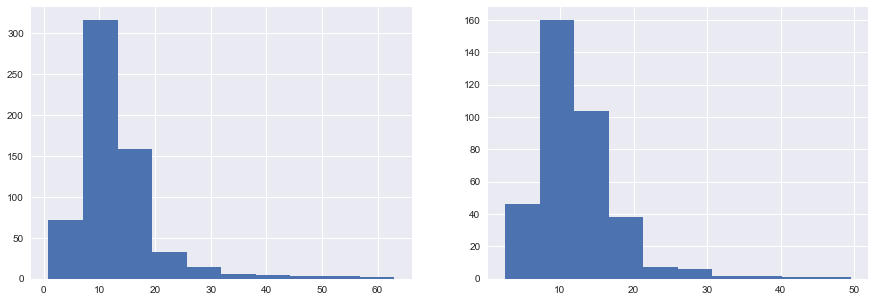

In [724]:
#Check EMI distribution
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
X_train.EMI.hist(ax=axis1)
X_test.EMI.hist(ax=axis2)
plt.show()
#indicates skewed distribution

In [725]:
#Banks use EMI/Income ratio to evaluate loans for loan approval process, higher this ratio, reduced are chances to get a loan
X_train['EMI/Income']=X_train.EMI/X_train.Total_Income
X_test['EMI/Income']=X_test.EMI/X_test.Total_Income

In [726]:
#Check the train set now
X_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI,EMI/Income
0,LP001015,1,1,0,0,0,110.0,360,1.0,2,5720,9.90,0.001731
1,LP001022,1,1,1,0,0,126.0,360,1.0,2,4576,11.34,0.002478
2,LP001031,1,1,2,0,0,208.0,360,1.0,2,6800,18.72,0.002753
3,LP001035,1,1,2,0,0,100.0,360,1.0,2,4886,9.00,0.001842
4,LP001051,1,0,0,1,0,78.0,360,1.0,2,3276,7.02,0.002143


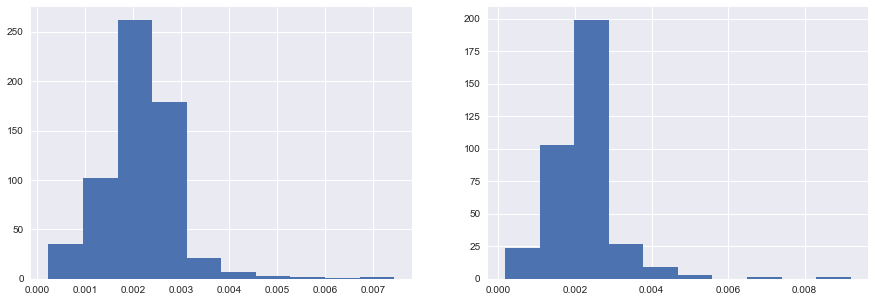

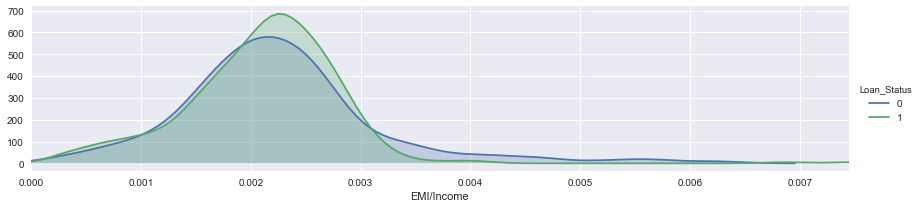

In [727]:
#Check EMI/Income distribution
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
X_train['EMI/Income'].hist(ax=axis1)
X_test['EMI/Income'].hist(ax=axis2)

#draw density plots
facet = sns.FacetGrid(X_train, hue="Loan_Status",aspect=4)
facet.map(sns.kdeplot,'EMI/Income',shade= True)
facet.set(xlim=(0, X_train['EMI/Income'].max()))
facet.add_legend()
plt.show()

#not so skewed unlike the distributions of features it is derived from

In [728]:
#Now as EMI/Income is derived from EMI, LoanAmount, Loan_Amount_Term and Total_Income there is high correlation amongst these
#We will retain EMI/Income and drop features it is derived from, hence need not take log transformations to handle outliers
X_train.drop(labels=['Total_Income','LoanAmount','Loan_Amount_Term','EMI'], inplace=True, axis=1)
X_test.drop(labels=['Total_Income','LoanAmount','Loan_Amount_Term','EMI'], inplace=True, axis=1)

In [731]:
#Check X_train
X_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,EMI/Income
0,LP001002,1,0,0,0,0,1.0,2,1,0.002304
1,LP001003,1,1,1,0,0,1.0,0,0,0.001891
2,LP001005,1,1,0,0,1,1.0,2,1,0.001980
3,LP001006,1,1,0,1,0,1.0,2,1,0.002186
4,LP001008,1,0,0,0,0,1.0,2,1,0.002115


In [732]:
#Separate out labels
y_train= X_train['Loan_Status'].copy()
X_train.drop(labels=['Loan_Status'], inplace=True, axis=1)

In [733]:
#Drop Loan_ID
X_train.drop(labels=['Loan_ID'], inplace=True, axis=1)

submission_loanid=X_test['Loan_ID'].copy()
X_test.drop(labels=['Loan_ID'], inplace=True, axis=1)

In [734]:
#Now our Train and Set sets are ready for modeling

In [735]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_logreg=logreg.predict(X_train)
accuracy = metrics.accuracy_score(y_train,y_logreg)
print "Accuracy (Training Data) : %s" % "{0:.2%}".format(accuracy)

print "Cross Validation Score : %s" % "{0:.2%}".format((cval.cross_val_score(logreg, X_train, y_train, cv=5).mean()))

y_logreg_test=logreg.predict(X_test)

Accuracy (Training Data) : 80.94%
Cross Validation Score : 80.96%


In [736]:
#Random Forest Classification
rf = RandomForestClassifier(max_features=2, min_samples_split=5, max_depth=3, n_estimators=100, criterion='gini', random_state=15325)
rf.fit(X_train, y_train)

y_rf=rf.predict(X_train)

accuracy = metrics.accuracy_score(y_train,y_rf)
print "Accuracy (Training Data) : %s" % "{0:.2%}".format(accuracy)

print "Cross Validation Score : %s" % "{0:.2%}".format((cval.cross_val_score(rf, X_train, y_train, cv=5).mean()))

y_rf_test=rf.predict(X_test)

Accuracy (Training Data) : 81.76%
Cross Validation Score : 80.79%


In [737]:
#XGBoost
gbm = xgb.XGBClassifier(n_estimators=180)
gbm.fit(X_train, y_train)

y_xgb=gbm.predict(X_train)

accuracy = metrics.accuracy_score(y_train,y_xgb)
print "Accuracy (Training Data) : %s" % "{0:.2%}".format(accuracy)

print "Cross Validation Score : %s" % "{0:.2%}".format((cval.cross_val_score(gbm, X_train, y_train, cv=5).mean()))

y_xgb_test=gbm.predict(X_test)

Accuracy (Training Data) : 85.50%
Cross Validation Score : 78.02%


In [738]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

#scale the data for KNN
stdscaler=preprocessing.StandardScaler().fit(X_train)
scaled_train=stdscaler.transform(X_train)
scaled_test=stdscaler.transform(X_test)

knn.fit(scaled_train, y_train)
y_knn=knn.predict(scaled_train)

accuracy = metrics.accuracy_score(y_train,y_knn)
print "Accuracy (Training Data) : %s" % "{0:.2%}".format(accuracy)
print "Cross Validation Score : %s" % "{0:.2%}".format((cval.cross_val_score(knn,scaled_train, y_train, cv=5).mean()))

y_knn_test=knn.predict(scaled_test)

Accuracy (Training Data) : 83.06%
Cross Validation Score : 78.04%


In [739]:
#Upload labels for submission
test_labels=pd.DataFrame(y_xgb_test) #test labels for different algorithms
test_labels['Loan_ID']=submission_loanid
test_labels['Loan_Status']=test_labels[0]
test_labels=test_labels.drop(labels=[0],axis=1)
test_labels.Loan_Status = test_labels.Loan_Status.map({1:'Y', 0:'N'}) 
test_labels.to_csv('Loan Predictions_Chhavi Saluja.csv',sep=',',index=False)

In [740]:
#For Final Submission I have used XGBoost
#Public Leaderboard Score (Rank) - 80.5556 (26)